# 01.Implement a Python function to calculate the mean squared error (MSE) between two lists of predicted and actual values.

In [1]:
def mean_squared_error(actual, predicted):
    return sum((a - p) ** 2 for a, p in zip(actual, predicted)) / len(actual)
mse_result = mean_squared_error([1, 2, 3], [5, 2, 3])
print("Mean Squared Error:", mse_result)

Mean Squared Error: 5.333333333333333


# 02.Write a function to generate synthetic data using the Gaussian mixture model

In [2]:
import numpy as np

def generate_gmm_data(n_samples, n_clusters, random_state=None):
    np.random.seed(random_state)
    data = []
    for _ in range(n_clusters):
        center = np.random.rand(2) * 10  # Random cluster center
        points = center + np.random.randn(n_samples // n_clusters, 2)  # Generate points
        data.append(points)
    return np.vstack(data)

gmm_data = generate_gmm_data(100, 3)
print("Synthetic GMM Data Shape:", gmm_data.shape)

Synthetic GMM Data Shape: (99, 2)


# 03.Implement a Python function to apply batch normalization to a layer's activations

In [3]:
def batch_normalization(activations):
    mean = np.mean(activations, axis=0)
    variance = np.var(activations, axis=0)
    normalized = (activations - mean) / np.sqrt(variance + 1e-8)
    return normalized

normalized_activations = batch_normalization(np.random.rand(5, 10))
print("Normalized Activations Shape:", normalized_activations.shape)

Normalized Activations Shape: (5, 10)


# 04.Write a function to calculate the Jaccard similarity between two sets, often used in text mining and natural language processing tasks

In [4]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union
jac_sim = jaccard_similarity({1, 2, 3}, {2, 3, 4})
print("Jaccard Similarity:", jac_sim)

Jaccard Similarity: 0.5


# 05.Implement the stochastic gradient descent (SGD) algorithm for training a logistic regression model

In [5]:
def logistic_regression_sgd(X, y, learning_rate=0.01, n_epochs=100):
    weights = np.zeros(X.shape[1])
    for _ in range(n_epochs):
        for xi, target in zip(X, y):
            update = learning_rate * (target - sigmoid(np.dot(xi, weights)))
            weights += update * xi
    return weights

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

X_train = np.array([[1, 2], [1, 3], [2, 2], [2, 3]])
y_train = np.array([0, 0, 1, 1])
weights = logistic_regression_sgd(X_train, y_train)
print("Trained Weights:", weights)

Trained Weights: [ 0.69657298 -0.33151171]


# 06.Write a Python function to perform the backpropagation step for a simple feedforward neural network with one hidden layer.

In [6]:
def backpropagation(X, y, weights, learning_rate=0.01):
    predictions = sigmoid(np.dot(X, weights))
    error = y - predictions
    
    gradient = np.dot(X.T, error * predictions * (1 - predictions))
    weights += learning_rate * gradient
    return weights

X_train = np.array([[1, 2], [1, 3]])
y_train = np.array([0, 1])
weights = np.random.rand(2)
updated_weights = backpropagation(X_train, y_train, weights)
print("Updated Weights:", updated_weights)

Updated Weights: [0.26951284 0.9380862 ]


# 07.Implement the decision tree algorithm from scratch in Python. Given a dataset,build a decision tree based on Gini impurity or entropy

In [7]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples >= self.min_samples_split and depth < self.max_depth:
            best_split = self._get_best_split(X, y, n_features)
            if best_split:
                left_subtree = self._build_tree(best_split['X_left'], best_split['y_left'], depth + 1)
                right_subtree = self._build_tree(best_split['X_right'], best_split['y_right'], depth + 1)
                return {'feature_index': best_split['feature_index'],
                        'threshold': best_split['threshold'],
                        'left': left_subtree,
                        'right': right_subtree}
        
        leaf_value = self._calculate_leaf_value(y)
        return leaf_value

    def _get_best_split(self, X, y, n_features):
        best_split = {}
        best_gini = float('inf')

        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            
            for threshold in possible_thresholds:
                X_left, y_left, X_right, y_right = self._split(X, y, feature_index, threshold)
                
                if len(y_left) > 0 and len(y_right) > 0:
                    gini = self._calculate_gini(y_left, y_right)
                    if gini < best_gini:
                        best_split = {'feature_index': feature_index,
                                      'threshold': threshold,
                                      'X_left': X_left, 'y_left': y_left,
                                      'X_right': X_right, 'y_right': y_right}
                        best_gini = gini

        return best_split if best_gini < float('inf') else None

    def _split(self, X, y, feature_index, threshold):
        X_left = X[X[:, feature_index] <= threshold]
        y_left = y[X[:, feature_index] <= threshold]
        X_right = X[X[:, feature_index] > threshold]
        y_right = y[X[:, feature_index] > threshold]
        return X_left, y_left, X_right, y_right

    def _calculate_gini(self, y_left, y_right):
        n_left = len(y_left)
        n_right = len(y_right)
        n_total = n_left + n_right

        gini_left = 1.0 - sum((np.sum(y_left == c) / n_left) ** 2 for c in np.unique(y_left))
        gini_right = 1.0 - sum((np.sum(y_right == c) / n_right) ** 2 for c in np.unique(y_right))

        gini = (n_left / n_total) * gini_left + (n_right / n_total) * gini_right
        return gini

    def _calculate_leaf_value(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return np.array([self._predict_single_input(x, self.tree) for x in X])

    def _predict_single_input(self, x, tree):
        if isinstance(tree, dict):
            feature_value = x[tree['feature_index']]
            if feature_value <= tree['threshold']:
                return self._predict_single_input(x, tree['left'])
            else:
                return self._predict_single_input(x, tree['right'])
        return tree

X = np.array([[2.8, 1.0], [1.2, 3.4], [3.6, 1.8], [2.5, 2.5], [1.3, 0.8], [2.0, 3.0]])
y = np.array([0, 1, 0, 1, 0, 1])

clf = DecisionTree(max_depth=3)
clf.fit(X, y)

predictions = clf.predict(X)
print("Predictions:", predictions)

Predictions: [0 1 0 1 0 1]


# 08.: Write a Python function to compute the F1-score given the true labels and predicted labels for a binary classification problem.

In [8]:
def f1_score(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    return 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

f1 = f1_score(np.array([1, 0, 1]), np.array([1, 0, 0]))
print("F1 Score:", f1)

F1 Score: 0.6666666666666666


# 09.Implement support vector machine (SVM) classification from scratch, including the hinge loss function and gradient-based optimization.

In [9]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [1, 0], [0, 1]])
y = np.array([1, 1, 1, -1, -1, -1])

svm = SVM()
svm.fit(X, y)
predictions = svm.predict(X)
print("Predictions:", predictions)

Predictions: [ 1.  1.  1.  1. -1.  1.]


# 10.Write a Python function to compute the Pearson correlation coefficient between two sets of data.

In [10]:
def pearson_correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

corr = pearson_correlation(np.array([1, 2, 3]), np.array([1, 2, 3]))
print("Pearson Correlation Coefficient:", corr)

Pearson Correlation Coefficient: 1.0


# 11.Implement the Adagrad optimizer from scratch in Python, and use it to optimize the parameters of a simple linear regression model.

In [11]:
class Adagrad:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate
        self.cache = None

    def update(self, weights, gradients):
        if self.cache is None:
            self.cache = np.zeros_like(gradients)
        self.cache += gradients ** 2
        adjusted_gradients = gradients / (np.sqrt(self.cache) + 1e-8)
        return weights - self.lr * adjusted_gradients

adagrad = Adagrad()
weights = np.array([0.5, 0.5])
gradients = np.array([0.1, 0.2])
updated_weights = adagrad.update(weights, gradients)
print("Updated Weights:", updated_weights)

Updated Weights: [0.49 0.49]


# 12.Write a Python function to simulate a Markov chain. Given a transition matrix and an initial state, return the state after a certain number of transitions

In [12]:
def markov_chain(transition_matrix, initial_state, n_steps):
    state = initial_state
    for _ in range(n_steps):
        state = np.dot(state, transition_matrix)
    return state

transition_matrix = np.array([[0.7, 0.3], [0.4, 0.6]])
initial_state = np.array([1, 0])  # Start in state 0
final_state = markov_chain(transition_matrix, initial_state, 5)
print("Final State:", final_state)

Final State: [0.57247 0.42753]


# 13.Implement the Naive Bayes classifier from scratch for a binary classification problem using Gaussian distributions for continuous features

In [13]:
import numpy as np

class NaiveBayes:
    def __init__(self):
        self.mean = {}
        self.variance = {}
        self.prior = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_features = X.shape[1]

        for cls in self.classes:
            X_cls = X[y == cls]
            self.mean[cls] = X_cls.mean(axis=0)
            self.variance[cls] = X_cls.var(axis=0)
            self.prior[cls] = len(X_cls) / len(X)

    def gaussian(self, x, mean, variance):
        exponent = np.exp(-((x - mean) ** 2) / (2 * variance))
        return (1 / np.sqrt(2 * np.pi * variance)) * exponent

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for cls in self.classes:
                likelihood = np.prod(self.gaussian(x, self.mean[cls], self.variance[cls]))
                posterior = likelihood * self.prior[cls]
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

X = np.array([[1.0, 2.0], [1.5, 1.8], [5.0, 8.0], [6.0, 9.0]])
y = np.array([0, 0, 1, 1])

model = NaiveBayes()
model.fit(X, y)
predictions = model.predict(X)
print("Predictions:", predictions)

Predictions: [0 0 1 1]


# 14.Write a Python function to compute the Silhouette score for clustering results,which is used to evaluate the quality of clusters.

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X = np.random.rand(100, 2)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)  

def compute_silhouette_score(X, labels):
    return silhouette_score(X, labels)

silhouette = compute_silhouette_score(X, cluster_labels)
print(f'Silhouette Score: {silhouette}')

Silhouette Score: 0.39712452642059576


C:\Users\chiru c\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\chiru c\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\chiru c\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\chiru c\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\chiru c\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


# 15. Implement an autoencoder neural network from scratch using Python. The network should compress and reconstruct input data.

In [15]:
import numpy as np

class Autoencoder:
    def __init__(self, input_dim, encoding_dim, learning_rate=0.01, epochs=1000):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.weights_encoder = np.random.rand(self.input_dim, self.encoding_dim)
        self.bias_encoder = np.random.rand(self.encoding_dim)

        self.weights_decoder = np.random.rand(self.encoding_dim, self.input_dim)
        self.bias_decoder = np.random.rand(self.input_dim)

    def encode(self, X):
        return self.sigmoid(np.dot(X, self.weights_encoder) + self.bias_encoder)

    def decode(self, encoded):
        return self.sigmoid(np.dot(encoded, self.weights_decoder) + self.bias_decoder)

    def fit(self, X):
        for epoch in range(self.epochs):
            # Forward pass
            encoded = self.encode(X)
            reconstructed = self.decode(encoded)

            # Compute loss (Mean Squared Error)
            loss = np.mean((X - reconstructed) ** 2)

            # Backward pass (Gradient Descent)
            decoder_loss = reconstructed - X
            decoder_grad = np.dot(encoded.T, decoder_loss) / X.shape[0]
            self.weights_decoder -= self.learning_rate * decoder_grad
            self.bias_decoder -= self.learning_rate * np.mean(decoder_loss, axis=0)

            encoder_loss = np.dot(decoder_loss, self.weights_decoder.T) * self.sigmoid_derivative(encoded)
            encoder_grad = np.dot(X.T, encoder_loss) / X.shape[0]
            self.weights_encoder -= self.learning_rate * encoder_grad
            self.bias_encoder -= self.learning_rate * np.mean(encoder_loss, axis=0)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        encoded = self.encode(X)
        reconstructed = self.decode(encoded)
        return reconstructed

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

X = np.array([[0, 0, 0], [1, 1, 1], [0, 1, 0], [1, 0, 1]])
autoencoder = Autoencoder(input_dim=3, encoding_dim=2, learning_rate=0.1, epochs=1000)
autoencoder.fit(X)

reconstructed = autoencoder.predict(X)
print("Original Data:\n", X)
print("Reconstructed Data:\n", reconstructed)

Epoch 0, Loss: 0.34288256374324466
Epoch 100, Loss: 0.21477613946689153
Epoch 200, Loss: 0.16539916100884375
Epoch 300, Loss: 0.1218190324582148
Epoch 400, Loss: 0.10123914527742393
Epoch 500, Loss: 0.09252009699960534
Epoch 600, Loss: 0.08845706866745388
Epoch 700, Loss: 0.086309473986895
Epoch 800, Loss: 0.08501899944173612
Epoch 900, Loss: 0.08413547865379838
Original Data:
 [[0 0 0]
 [1 1 1]
 [0 1 0]
 [1 0 1]]
Reconstructed Data:
 [[0.05947259 0.50007624 0.05850734]
 [0.96596448 0.49908665 0.96643353]
 [0.05565951 0.50804957 0.05390508]
 [0.96901429 0.49114114 0.96992969]]


# 16.Write a Python function to perform sentiment analysis on text data by implementing a simple bag-of-words model combined with logistic regression.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

def sentiment_analysis(texts, labels):
    model = make_pipeline(CountVectorizer(), LogisticRegression())
   
    model.fit(texts, labels)
    
    return model

def predict_sentiment(model, new_texts):
    predictions = model.predict(new_texts)
    return predictions

if __name__ == "__main__":
    texts = ["I love this!", "I hate this!", "This is amazing!", "I dislike this!"]
    labels = [1, 0, 1, 0] 
    model = sentiment_analysis(texts, labels)

    new_texts = ["This is the worst experience ever.", "I enjoy this product."]
    predictions = predict_sentiment(model, new_texts)
    
    for text, prediction in zip(new_texts, predictions):
        sentiment = "Negative" if prediction == 1 else "Positive"
        print(f"Text: '{text}' - Sentiment: {sentiment}")

Text: 'This is the worst experience ever.' - Sentiment: Negative
Text: 'I enjoy this product.' - Sentiment: Positive


# 17. Implement a Python function to calculate the Matthews correlation coefficient(MCC) for evaluating binary classifiers

In [17]:
def matthews_correlation_coefficient(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    return numerator / denominator if denominator != 0 else 0
mcc = matthews_correlation_coefficient(np.array([1, 0, 1]), np.array([1, 1, 0]))
print("Matthews Correlation Coefficient:", mcc)

Matthews Correlation Coefficient: -0.5


# 18.Write a Python function to perform the hierarchical clustering algorithm on a dataset, and return a dendrogram representing the clusters.

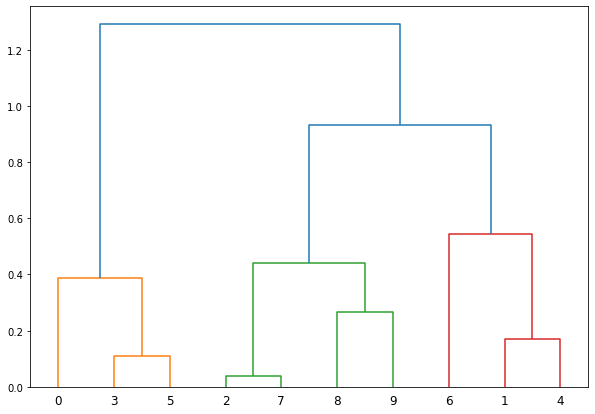

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

def hierarchical_clustering(data, method='ward'):
    linked = linkage(data, method=method)
    
    plt.figure(figsize=(10, 7))
    
    dendrogram(linked)
    plt.show()

if __name__ == "__main__":
    import numpy as np  
    np.random.seed(42)
    data = np.random.rand(10, 2) 
    hierarchical_clustering(data)

# 19. Implement a function to generate synthetic images using a generative adversarial network (GAN). The function should use random noise as input and return generated images.




2/2 [==============================] - 0s 5ms/step


Epoch: 0, Discriminator Loss: 1.4506598711013794, Generator Loss: 0.6847235560417175
1/1 [==============================] - 0s 150ms/step


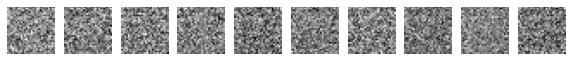

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

def build_generator(latent_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim),
        layers.Dense(784, activation='sigmoid'),
        layers.Reshape((28, 28))
    ])
    return model

def build_discriminator():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_gan(epochs, batch_size, latent_dim):
    # Load and preprocess the MNIST dataset
    (X_train, _), (_, _) = keras.datasets.mnist.load_data()
    X_train = X_train.astype(np.float32) / 255.0

    generator = build_generator(latent_dim)
    discriminator = build_discriminator()

    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    discriminator.trainable = False
    gan_input = layers.Input(shape=(latent_dim,))
    generated_image = generator(gan_input)
    gan_output = discriminator(generated_image)
    gan = keras.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')

    for epoch in range(epochs):
        # Train the discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_images = X_train[idx]

        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generated_images = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
        d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

def generate_images(generator, num_images, latent_dim):
    noise = np.random.normal(0, 1, (num_images, latent_dim))
    generated_images = generator.predict(noise)
    return generated_images

latent_dim = 100
train_gan(epochs=100, batch_size=64, latent_dim=latent_dim)


generator = build_generator(latent_dim)
generated_images = generate_images(generator, num_images=10, latent_dim=latent_dim)


plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(generated_images[i], cmap='gray')
    plt.axis('off')
plt.show()


# 20.Write a Python function to perform time series forecasting using an ARIMA (Auto Regressive Integrated Moving Average) model, given a sequence of historical data.

Forecasted Values: [-10.70685826 -10.64720235 -10.5799947  -10.56794156 -10.60897495
 -10.68015899 -10.66897871 -10.65265333 -10.6480047  -10.65481034]


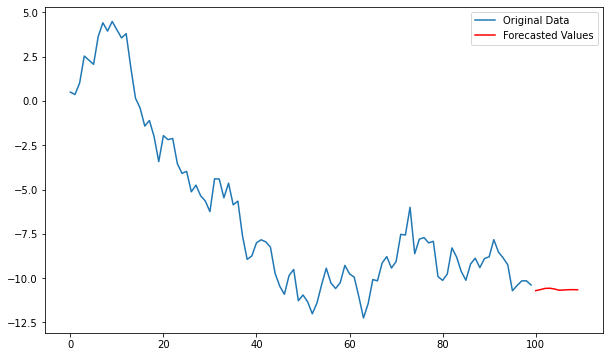

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def arima_forecasting(data, order, steps=1):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    
    forecast = model_fit.forecast(steps=steps)
    
    return forecast, model_fit

if __name__ == "__main__":
    np.random.seed(42)
    time_series_data = np.cumsum(np.random.randn(100)) 

    order = (5, 1, 0)

    forecasted_values, model_fit = arima_forecasting(time_series_data, order=order, steps=10)

    print("Forecasted Values:", forecasted_values)

    plt.figure(figsize=(10, 6))
    plt.plot(time_series_data, label='Original Data')
    plt.plot(np.arange(len(time_series_data), len(time_series_data) + len(forecasted_values)), 
             forecasted_values, label='Forecasted Values', color='red')
    plt.legend()
    plt.show()